**Global imports**

In [1]:
import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt
from src.scripts import filters
from datetime import datetime
import matplotlib.dates as mdates
import importlib
from datetime import date

from src.utils import keywords
importlib.reload(keywords)
# from src.utils import analysis_tools

<module 'src.utils.keywords' from 'c:\\Users\\jadbh\\Documents\\Swisse\\EPFL\\courses\\Fall 2024\\ADA\\my project folder 2\\src\\utils\\keywords.py'>

**Path definitions**

In [2]:
path_df_channels_en = 'data/df_channels_en.tsv'
# TODO: not used yet path_df_channels_filtered = 'data/filtered_df_channels_en.csv'

path_df_timeseries = 'data/df_timeseries_en.tsv'

path_yt_metadata_feather = 'data/yt_metadata_helper.feather'
path_yt_metadata_feather_filtered = 'data/filtered_yt_metadata_helper.feather.csv'

path_yt_metadata = 'data/yt_metadata_en.jsonl'
path_yt_metadata_filtered = 'data/filtered_yt_metadata.csv'

path_final_channels = 'data/final_channels.csv'
path_final_timeseries = 'data/final_timeseries.csv'
path_final_yt_metadata_feather = 'data/final_yt_metadata_helper.csv'
path_final_yt_metadata = 'data/final_yt_metadata.csv'

## 2 How US News report on different events <a class="anchor" id="status_quo"></a>

### 2.1 Get relevant videos per event <a class="anchor" id="status_quo-videos_per_event"></a>

TODO: USING JADS CODE AND PLOTS

In [3]:
# load data in such a way to avoid errors
metadata = pl.read_csv(path_final_yt_metadata,  schema_overrides={
                                "dislike_count": pl.Float64,
                                "like_count": pl.Float64},
                                ignore_errors = True)

In [4]:
# counting erroneous like/dislike and date entries
keywords.summarize_outliers(metadata)

Total number of videos: 2,548,064
Date Outlier Count: 164,271
Like/Dislike Outlier Count (null elements): 223,686


In [5]:
# removing rows there the like or dislike entry is null, or where the date entry is erroneous (like "17")
metadata = keywords.filtering_bad_rows(metadata)

Original metadata shape: (2,548,064, 12)
New metadata shape: (2,324,376, 12)


In [6]:
keywords.summarize_outliers(metadata)

Total number of videos: 2,324,376
Date Outlier Count: 0
Like/Dislike Outlier Count (null elements): 0


In [7]:
## removing the hour time from the upload_date since it's always 00:00:00
metadata = keywords.remove_hour(metadata)

In [8]:
list(metadata['title'].sample(20))

['Remove Old Tattoos 12/21/16',
 "Wednesday's Child: 7-Year-Old Ryan",
 "Europa's Oceans May Be Exactly Like Earth's",
 'State Fair Experience 2017 Day 10 Session 88',
 'Lockdown lifted at College of Idaho',
 'National Cherry Blossom Festival sights and sounds',
 'Cleaning up after Hurricane Michael',
 'Fentanyl patches recalled nationwide due to dosage mislabeling',
 'Virtual Kissing Machine',
 'William Drive re-launch begins Saturday morning',
 'Remembering Houston police sergeant killed in Harvey floodwaters',
 "Jim Cramer: US companies are being told it's their own fault for still being in China",
 'Can Wearing A Hat Contribute To Baldness? | TIME',
 "Rich Fields' Weather Forecast (Nov. 17)",
 "Digital Dive: Twins' Eagle fiasco, Big Papi and Aly Raisman and another JT selfie",
 "Saturday's forecast",
 '31 oil refinery workers strike gold with big lottery win',
 'Appleton Remembers Victims of Sandy Hook Elementary Shooting',
 '"A Christmas Story: the Musical" at the Aronoff Center',

In [9]:
metadata

categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
str,str,str,str,f64,str,i64,f64,str,str,date,str
"""People & Blogs""","""UCzF4Ryn8TKn64md77gS5Q5Q""","""2019-11-04 21:11:23.560250""","""There has been a lot of emotio…",0.0,"""BFlU3b68aNs""",60,3.0,"""politics,news""","""Online reaction swift after Ge…",2019-03-29,"""401 """
"""People & Blogs""","""UCzF4Ryn8TKn64md77gS5Q5Q""","""2019-11-04 21:11:25.961967""","""The measure outlaws abortions …",2.0,"""rbBK6syU-fY""",259,31.0,"""politics,news""","""Georgia House passes 'heartbea…",2019-03-29,"""916 """
"""People & Blogs""","""UCzF4Ryn8TKn64md77gS5Q5Q""","""2019-11-04 21:11:28.406280""","""The bear has been spotted by s…",0.0,"""u5pwbK0_E0c""",769,7.0,"""animals,local,news,life""","""'Buckhead Bear' spotted rummag…",2019-03-29,"""116 """
"""People & Blogs""","""UCzF4Ryn8TKn64md77gS5Q5Q""","""2019-11-04 21:11:30.764228""","""The former X-Factor contestant…",1.0,"""qUPXnZseiTc""",167,34.0,"""the-a-scene,entertainment,tele…","""Behind the sound: Simone Torre…",2019-03-29,"""2521 """
"""People & Blogs""","""UCzF4Ryn8TKn64md77gS5Q5Q""","""2019-11-04 21:11:24.684348""","""A yummy springtime spread with…",0.0,"""1JvFjfzlbE8""",359,1.0,"""atlanta-and-company,entertainm…","""Springtime Spread with Lara Ly…",2019-03-29,"""41 """
…,…,…,…,…,…,…,…,…,…,…,…
"""News & Politics""","""UCry2gCVdntv6r661sKUiKXw""","""2019-11-01 21:05:41.255325""","""A new documentary film explore…",0.0,"""XU-phrdiMYQ""",199,0.0,"""WCCO Mid-Morning,reynold phili…","""New Documentary Focused On Min…",2017-06-22,"""1054 """
"""News & Politics""","""UCry2gCVdntv6r661sKUiKXw""","""2019-11-01 21:05:41.963190""","""This Saturday, there's a big e…",0.0,"""cK19B-6ukFs""",189,0.0,"""WCCO Mid-Morning,heartbeat 500…","""Race for Children's: HeartBeat…",2017-06-22,"""21 """
"""News & Politics""","""UCry2gCVdntv6r661sKUiKXw""","""2019-11-01 21:05:42.668689""","""A group of men in Europe are p…",0.0,"""CNrH1AA6wpo""",63,2.0,"""WCCO Mid-Morning,skirts,protes…","""Viewers Weigh In On Men Protes…",2017-06-22,"""74 """


Event: Hurricane Harvey (2017)
Related videos found: 2,681
------------
Event: California Wildfires (2018)
Related videos found: 2,559
------------
Event: Hurricane Maria (2017)
Related videos found: 1,077
------------
Event: Hurricane Michael (2018)
Related videos found: 1,154
------------
Event: Sulawesi Earthquake and Tsunami (2018)
Related videos found: 108
------------
Event: Nepal Earthquake (2015)
Related videos found: 238
------------
Event: Bangladesh Cyclone Mora (2017)
Related videos found: 5
------------
Event: India Floods in Kerela (2018)
Related videos found: 22
------------
Event: Europe Heatwaves (2019)
Related videos found: 60
------------
Event: Portugal Wildfires (2017)
Related videos found: 24
------------
Event: European Floods (2014)
Related videos found: 7
------------
Event: Greek Wildfires (2018)
Related videos found: 64
------------
Event: Italy Earthquakes (2016)
Related videos found: 129
------------
Event: Mosul Offensive (2016-2017) - Iraq
Related videos 

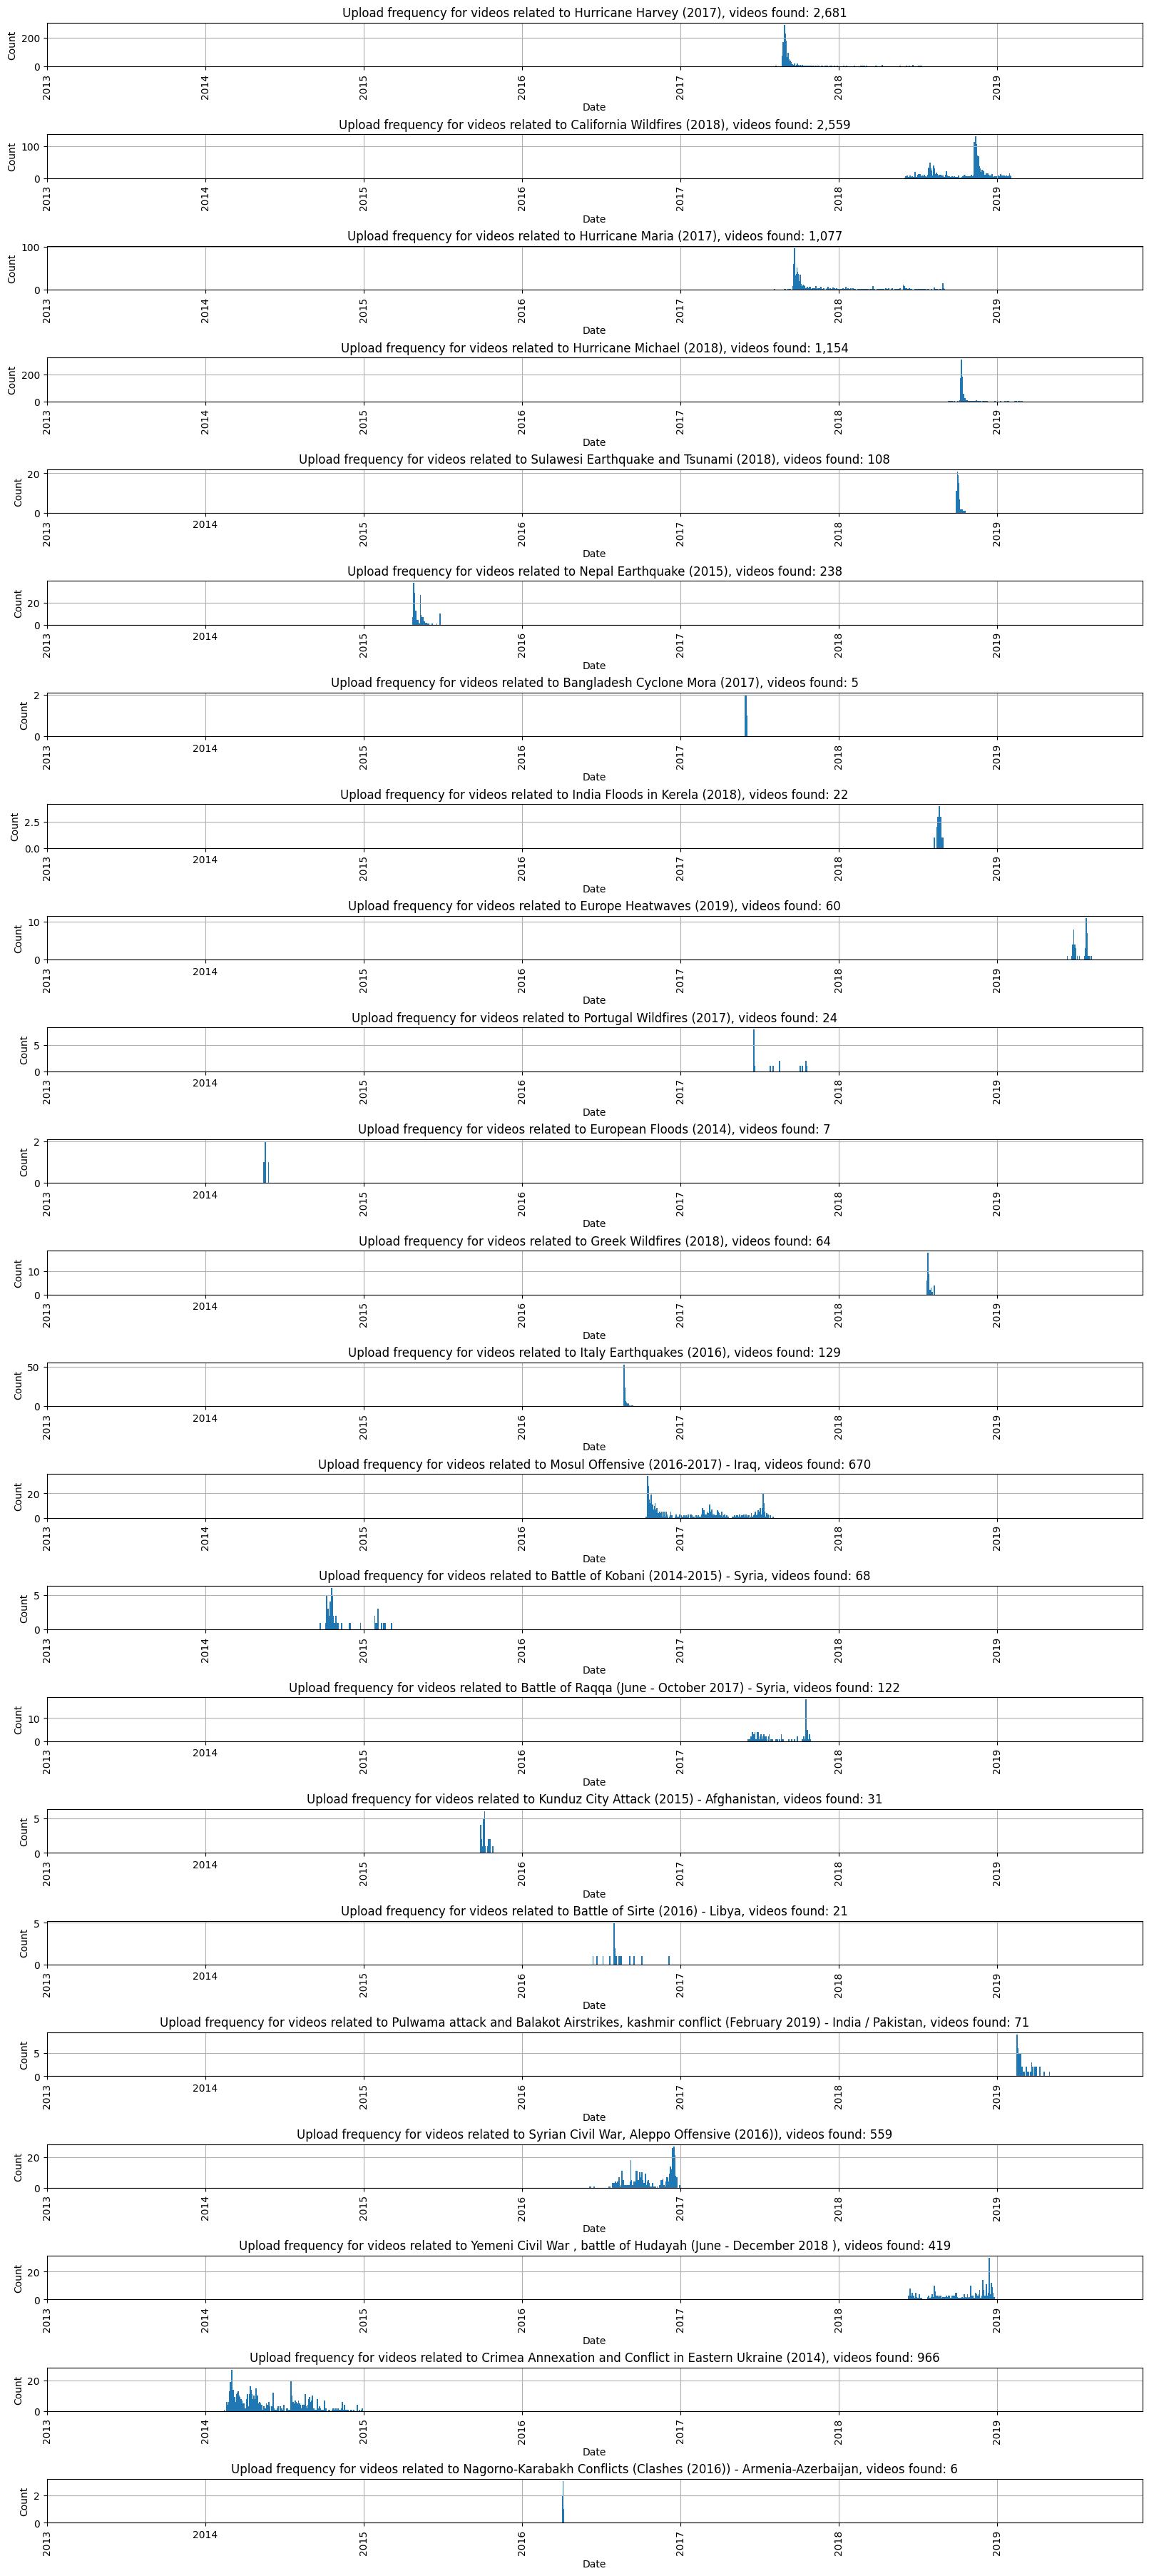

In [10]:
# plot the evolution of upload frequency for each event
importlib.reload(keywords)

"""
# all_plots = True to plot for all the events, disregards chosen index. Else plot for the even corresponding to chosen index
# grouping_mode: "daily", "weekly", "monthly"

 """
index = 4  # 0-N List is found in keywords.py

crop_time = True

metadata_2 = metadata.clone()

metadata_2 = metadata_2.filter(
    ~ ((metadata_2["channel_id"] == "UCKQECjul8nw1KW_JzfBTP1A")) # & (metadata_2["upload_date"] < date(2018, 4, 9)))
)

metadata_2 = metadata_2.filter(
   ~ ((metadata_2["channel_id"] == "UC_YFbvKedjnVjqrZqBR4L8Q")) #  & (metadata_2["upload_date"] < date(2018, 4, 9)))
)

metadata_2 = metadata_2.filter(                                                 # to remove completely
   ~ (metadata_2["channel_id"] == "UCN3me_2IdGN5C0QV5PubDlQ")
)

metadata_2 = metadata_2.filter(
    ~ ((metadata_2["channel_id"] == "UCupvZG-5ko_eiXAupbDfxWw") & (metadata_2["upload_date"] < date(2016, 7, 22)))
)

metadata_2 = metadata_2.filter(
    ~ ((metadata_2["channel_id"] == "UCXIJgqnII2ZOINSWNOGFThA"))
)

output = keywords.plot_update_freq(index, metadata_2, all_plots = True, grouping_mode = "daily", crop_time = crop_time, generate = True)     # function that can take individual terms (with or) and groups of terms (with and)

In [11]:
# output.filter(output["event"] == "Hurricane Michael (2018)")["event_type"].value_counts()
list(output['title'])

['Gov  Abbott, VP Pence among speakers at Southern Baptist Convention in Dallas',
 '25-year-old man enrolled at third North Texas high school',
 '25yr old Man Posed as High School Student and played HS basketball.. Parents, students shocked',
 'Dallas may have to pay back $4 million to feds',
 'Day 2 of flooding for Rockwall homeowners',
 'More Rain, More Flooding and Much Colder!',
 'LimeBike blames residents for bikes flooding Katy Trail',
 'Ariell Flood - 2017 Komen Dallas Race for the Cure',
 'New law affecting storm-related lawsuits is now in effect for Texas',
 'Mexican Red Cross helps evacuees in Houston',
 'Houston begins cleaning up after Hurricane Harvey',
 'Beaumont struggles to recover from floods',
 'Retirement home evacuated in Beaumont due to flooding',
 'Volunteers help flooded Kingwood residents',
 'Dallas City Council approves funding for Harvey evacuees',
 'Flooding continues in parts of Texas',
 'Harvey:  Thousands still need rescue from flood waters',
 'Good Samari

In [12]:
# output.write_csv("final_classified_filtered_dataset.csv")